In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D


from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import random
import cv2
from tqdm import tqdm
import pandas as pd
np.random.seed(10)

Mounted at /content/drive


In [ ]:

label_code={ 'ALPINE CHOUGH' :0, 'ALTAMIRA YELLOWTHROAT' :1,'AMERICAN BITTERN':2,'BAR-TAILED GODWIT':3,'BLACK THROATED WARBLER':4}
label_decode=[  'ALPINE CHOUGH' , 'ALTAMIRA YELLOWTHROAT' ,'AMERICAN BITTERN','BAR-TAILED GODWIT','BLACK THROATED WARBLER']

In [ ]:
import os
from PIL import Image
import numpy as np

#彩色圖片輸入,將channel 1 改成 3，data[i,:,:,:] = [arr[:,:,0],arr[:,:,1],arr[:,:,2]]

print(os.listdir('/content/drive/MyDrive/colab/dataset/test/bird/training'))
print(os.listdir('/content/drive/MyDrive/colab/dataset/test/bird/test'))
IMG_SIZE=(32,32)
IMG_CHANNELS =3
CATEGORIES = 5
def load_data():
	datasets=['/content/drive/MyDrive/colab/dataset/test/bird/training', '/content/drive/MyDrive/colab/dataset/test/bird/test']
	output=[]

	for datasets in datasets:
		images=[]
		labels=[]

		print("Loading {}".format(datasets))
	
		for folder in os.listdir(datasets):
			label = label_code[folder]
			for file in tqdm(os.listdir(os.path.join(datasets, folder))):
				img_path = os.path.join(os.path.join(datasets, folder), file)
				image = cv2.imread(img_path)
				image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
				image = cv2.resize(image, IMG_SIZE)
		
				images.append(image)
				labels.append(label)
		
		images = np.array(images, dtype = 'float32')
		labels = np.array(labels, dtype = 'int32')
		output.append((images,labels))
	return output



['ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN BITTERN', 'BAR-TAILED GODWIT', 'BLACK THROATED WARBLER']
['ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN BITTERN', 'BAR-TAILED GODWIT', 'BLACK THROATED WARBLER']


In [ ]:
# Step 1. 資料準備

(x_train,y_train),(x_test,y_test)=load_data()



Loading /content/drive/MyDrive/colab/dataset/test/bird/training


100%|██████████| 135/135 [00:01<00:00, 86.60it/s] 


Loading /content/drive/MyDrive/colab/dataset/test/bird/test


100%|██████████| 10/10 [00:02<00:00,  3.53it/s]


In [ ]:


index_1 = [i for i in range(len(x_train))]
random.shuffle(index_1)
x_train = x_train[index_1]
y_train = y_train[index_1]

index_2 = [i for i in range(len(x_test))]
random.shuffle(index_2)
x_test = x_test[index_2]
y_test = y_test[index_2]

print("train data:",'images:',x_train.shape," labels:",y_train.shape) 
print("test data:",'images:',x_test.shape," labels:",y_test.shape) 

x_train_normalize = x_train.astype('float32') / 255.0
x_test_normalize = x_test.astype('float32') / 255.0

y_train_OneHot = keras.utils.to_categorical(y_train)
y_test_OneHot = keras.utils.to_categorical(y_test)S

print('y_train_OneHot :',y_train_OneHot.shape)
print('y_test_OneHot :',y_test_OneHot.shape)

train data: images: (716, 32, 32, 3)  labels: (716,)
test data: images: (50, 32, 32, 3)  labels: (50,)
y_train_OneHot : (716, 5)
y_test_OneHot : (50, 5)


In [ ]:
# 模型

model = Sequential()

# 卷積層1與池化層1

model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32, 3), 
                 activation='relu', 
                 padding='same'))

model.add(Dropout(rate=0.25))

model.add(MaxPooling2D(pool_size=(4, 4)))

# 卷積層2與池化層2

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu', padding='same'))

model.add(Dropout(0.20))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu', padding='same'))


# 建立神經網路(平坦層、隱藏層、輸出層)

model.add(Flatten())
model.add(Dropout(rate=0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(5, activation='softmax'))

print(model.summary())

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_160 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 dropout_193 (Dropout)       (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_119 (MaxPooli  (None, 8, 8, 32)         0         
 ng2D)                                                           
                                                                 
 conv2d_161 (Conv2D)         (None, 8, 8, 32)          9248      
                                                                 
 dropout_194 (Dropout)       (None, 8, 8, 32)          0         
                                                                 
 max_pooling2d_120 (MaxPooli  (None, 4, 4, 32)         0         
 ng2D)                                               

In [ ]:
# 載入之前訓練的模型

try:
    model.load_weights("./cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


Epoch 1/30
5/5 [==============================] - 2s 188ms/step - loss: 1.5844 - acc: 0.2448 - val_loss: 1.5602 - val_acc: 0.3542
Epoch 2/30
5/5 [==============================] - 1s 155ms/step - loss: 1.4504 - acc: 0.4458 - val_loss: 1.4361 - val_acc: 0.4236
Epoch 3/30
5/5 [==============================] - 1s 150ms/step - loss: 1.2273 - acc: 0.5280 - val_loss: 1.2177 - val_acc: 0.6250
Epoch 4/30
5/5 [==============================] - 1s 146ms/step - loss: 1.0116 - acc: 0.6189 - val_loss: 1.0454 - val_acc: 0.6944
Epoch 5/30
5/5 [==============================] - 1s 146ms/step - loss: 0.8922 - acc: 0.6643 - val_loss: 1.0451 - val_acc: 0.6111
Epoch 6/30
5/5 [==============================] - 1s 149ms/step - loss: 0.8378 - acc: 0.6993 - val_loss: 0.9376 - val_acc: 0.6944
Epoch 7/30
5/5 [==============================] - 1s 150ms/step - loss: 0.7601 - acc: 0.7255 - val_loss: 0.9234 - val_acc: 0.7153
Epoch 8/30
5/5 [==============================] - 1s 146ms/step - loss: 0.7368 - acc: 0.73

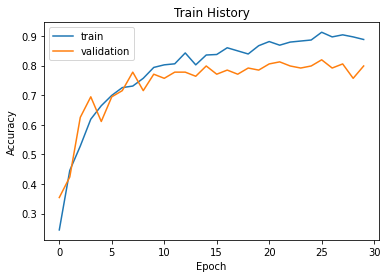

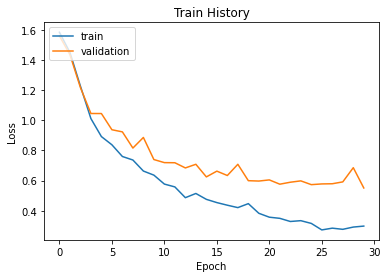

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
                                  width_shift_range=0.2 , 
                                  height_shift_range=0.2 ,                        
                                  zoom_range=0.2 )

train_datagen.fit(x_train_normalize)



model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])
train_history=model.fit(x_train_normalize, y_train_OneHot,
                        validation_split=0.2,
                        epochs=30, batch_size=128, verbose=1)          

import matplotlib.pyplot as plt
def show_train_history(train_type,test_type):
    plt.plot(train_history.history[train_type])
    plt.plot(train_history.history[test_type])
    plt.title('Train History')
    if train_type == 'acc':
        plt.ylabel('Accuracy')
    else:
        plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history('acc','val_acc')
show_train_history('loss','val_loss')



In [ ]:
# Step 6. 評估模型準確率

scores = model.evaluate(x_test_normalize,y_test_OneHot,verbose=0)
print('test_accr :',scores[1])
print('test_loss :',scores[0])

test_accr : 0.8399999737739563
test_loss : 0.545002818107605


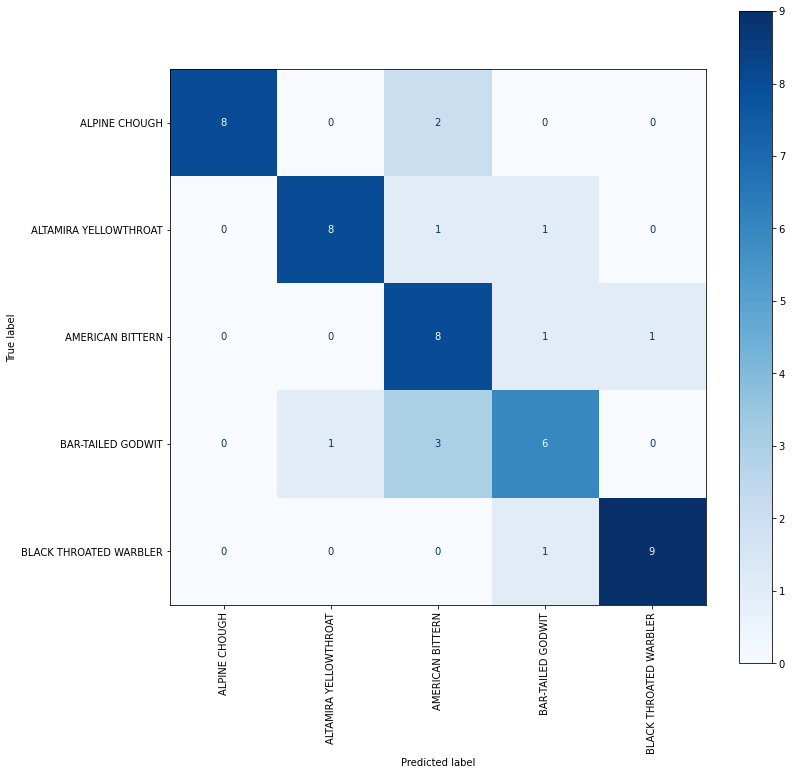

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predict_x = model.predict(x_test) 
y_pred = np.argmax(predict_x,axis=1)

cm = confusion_matrix(y_test  , y_pred)
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_decode)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(12, 12))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='Blues')

plt.show()

In [ ]:
# Step 8. Save Weight to h5 

model.save_weights("./weight.h5")
print("Saved model to disk")

Saved model to disk
